L1: Epoch 0, Loss: 2.438709
L1: Epoch 20, Loss: 0.125398
L1: Epoch 40, Loss: 0.104969
L1: Epoch 60, Loss: 0.091134
L1: Epoch 80, Loss: 0.081638


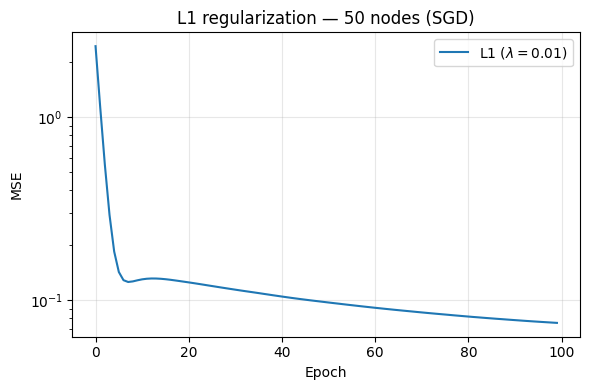

In [ ]:
import sys
sys.path.insert(0, '../')
import numpy as np 
np.random.seed(314)
from FFNN import FFNN
from functions import * 

class FFNN_L1(FFNN):
    def __init__(self, input_size, layer_output_sizes, lmbda=0.01):
        super().__init__(input_size, layer_output_sizes)
        self.lmbda = lmbda
    
    def backward_pass(self, y_ground, dactivation_funcs, learning_rate=0.01):
        a_final = self.forward_pass_values[-1]['a']
        dLda = 2 * (a_final - y_ground) / y_ground.shape[0]
        
        for i, ((W, b), dactivation_func) in enumerate(reversed(list(zip(self.layers, dactivation_funcs)))):
            layer_idx = len(self.layers) - 1 - i
            
            z = self.forward_pass_values[layer_idx + 1]['z']
            a_prev = self.forward_pass_values[layer_idx]['a']
            
            dLdz = dLda * dactivation_func(z)
            dLdW = a_prev.T @ dLdz + self.lmbda * np.sign(W)
            dLdb = np.sum(dLdz, axis=0)
            
            self.update_weights(layer_idx, W, b, dLdW, dLdb, learning_rate)
            
            dLda = dLdz @ W.T

np.random.seed(314)
x = np.linspace(-1, 1, 20).reshape(-1, 1)
y = runge_function(x)

activations = [sigmoid, identity]
derivatives = [sigmoid_derivative, identity_derivative]

losses_l1 = []
model_l1 = FFNN_L1(1, [50, 1], lmbda=0.01)

for epoch in range(100):
    for i in range(len(x)):
        output = model_l1.forward_pass(x[i:i+1], activations)
        model_l1.backward_pass(y[i:i+1], derivatives, learning_rate=0.01)
    
    output = model_l1.forward_pass(x, activations)
    loss = np.mean((output - y)**2)
    losses_l1.append(loss)
    
    if epoch % 20 == 0:
        print(f"L1: Epoch {epoch}, Loss: {loss:.6f}")
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(losses_l1, label=r"L1 ($\lambda=0.01$)")
ax.set_title("L1 regularization — 50 nodes (SGD)")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")
ax.set_yscale("log")
ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig("Figures/loss_l1_50.pdf", dpi=300)
plt.show()


""" Results
L1: Epoch 0, Loss: 2.438709
L1: Epoch 20, Loss: 0.125398
L1: Epoch 40, Loss: 0.104969
L1: Epoch 60, Loss: 0.091134
L1: Epoch 80, Loss: 0.081638
"""


L2: Epoch 0, Loss: 0.039385
L2: Epoch 20, Loss: 0.032725
L2: Epoch 40, Loss: 0.032553
L2: Epoch 60, Loss: 0.032963
L2: Epoch 80, Loss: 0.033690


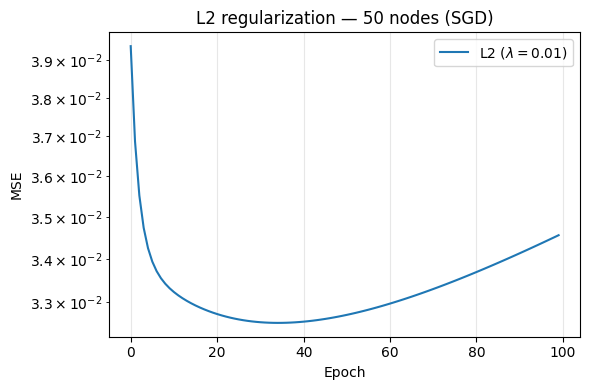

In [ ]:
class FFNN_L2(FFNN):
    def __init__(self, input_size, layer_output_sizes, lmbda=0.01):
        super().__init__(input_size, layer_output_sizes)
        self.lmbda = lmbda
    
    def backward_pass(self, y_ground, dactivation_funcs, learning_rate=0.01):
        a_final = self.forward_pass_values[-1]['a']
        dLda = 2 * (a_final - y_ground) / y_ground.shape[0]
        
        for i, ((W, b), dactivation_func) in enumerate(reversed(list(zip(self.layers, dactivation_funcs)))):
            layer_idx = len(self.layers) - 1 - i
            
            z = self.forward_pass_values[layer_idx + 1]['z']
            a_prev = self.forward_pass_values[layer_idx]['a']
            
            dLdz = dLda * dactivation_func(z)
            dLdW = a_prev.T @ dLdz + self.lmbda * W
            dLdb = np.sum(dLdz, axis=0)
            
            self.update_weights(layer_idx, W, b, dLdW, dLdb, learning_rate)
            
            dLda = dLdz @ W.T

losses_l2 = []
model_l2 = FFNN_L2(1, [50, 1], lmbda=0.01)

for epoch in range(100):
    for i in range(len(x)):
        output = model_l2.forward_pass(x[i:i+1], activations)
        model_l2.backward_pass(y[i:i+1], derivatives, learning_rate=0.01)
    
    output = model_l2.forward_pass(x, activations)
    loss = np.mean((output - y)**2)
    losses_l2.append(loss)
    
    if epoch % 20 == 0:
        print(f"L2: Epoch {epoch}, Loss: {loss:.6f}")


fig, ax = plt.subplots(figsize=(6,4))
ax.plot(losses_l2, label=r"L2 ($\lambda=0.01$)")
ax.set_title("L2 regularization — 50 nodes (SGD)")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")
ax.set_yscale("log")
ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig("Figures/loss_l2_50.pdf", dpi=300)
plt.show()

""" Results
L2: Epoch 0, Loss: 0.039385
L2: Epoch 20, Loss: 0.032725
L2: Epoch 40, Loss: 0.032553
L2: Epoch 60, Loss: 0.032963
L2: Epoch 80, Loss: 0.033690
"""